# HW3 Q5 Programming Part: Breast Cancer Prognosis

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## (a) Download Data Set

In [86]:
df=pd.read_csv('wpbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


## (b) Select the first 130 non-recurrent cases and the first 37 recurrent cases as your training set. Add record #197 in the data set to your training set as well. (10pts)

In [87]:
train_data0=df[df[1]=='N'].iloc[:130]
train_data1=df[df[1]=='R'].iloc[:37]
# train_data197=df.iloc[196]
# print(train_data197)

train_data=pd.concat([train_data0,train_data1,df.iloc[196].to_frame().T])
train_data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.6,117.5,1013.0,0.09489,0.1036,0.1086,...,139.7,1436.0,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3.0,2
2,842517,N,116,21.37,17.44,137.5,1373.0,0.08836,0.1189,0.1255,...,159.1,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,2.0,0
6,844359,N,60,18.98,19.61,124.4,1112.0,0.09087,0.1237,0.1213,...,152.6,1593.0,0.1144,0.3371,0.299,0.1922,0.2726,0.09581,1.5,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,9010018,R,5,15.08,25.74,98.0,716.6,0.1024,0.09769,0.1235,...,121.2,1050.0,0.166,0.2356,0.4029,0.1526,0.2654,0.09438,2.6,0
135,9012000,R,2,22.01,21.9,147.2,1482.0,0.1063,0.1954,0.2448,...,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,3.0,1
143,906023,R,49,15.5,21.08,102.9,803.1,0.112,0.1571,0.1522,...,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.1048,0.4,0
145,908194,R,1,20.18,19.54,133.8,1250.0,0.1133,0.1489,0.2133,...,146.0,1479.0,0.1665,0.2942,0.5308,0.2173,0.3032,0.08075,4.5,27


## (3) There are four instances in your training set that are missing the lymph node feature (denoted as ?). This is not a very severe issue, so replace the missing features with the median of the lymph node feature in your training set. (5 pts)

In [88]:
# four instances that are missing feature
train_data_missing=df[df[34]=='?'].iloc[:]
train_data_missing

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.1213,...,152.6,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
28,854253,N,12,16.74,21.59,110.10,869.5,0.09610,0.1336,0.1348,...,133.5,1229.0,0.1563,0.3835,0.5409,0.1813,0.4863,0.08633,1.5,?
85,877500,N,72,14.45,20.22,94.49,642.7,0.09872,0.1206,0.1180,...,117.9,1044.0,0.1552,0.4056,0.4967,0.1838,0.4753,0.10130,1.5,?
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.1939,0.2380,...,198.3,2375.0,0.1498,0.4379,0.5411,0.2215,0.2832,0.08981,3.0,?


In [89]:
median_lymph_nodes=pd.to_numeric(train_data[train_data[34]!='?'][34]).median()
print("median: ",median_lymph_nodes)

train_data[34]=train_data[34].replace('?',median_lymph_nodes)
train_data[34]=pd.to_numeric(train_data[34])  # transfer to number
train_data

median:  1.0


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.6,117.5,1013.0,0.09489,0.1036,0.1086,...,139.7,1436.0,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3.0,2.0
2,842517,N,116,21.37,17.44,137.5,1373.0,0.08836,0.1189,0.1255,...,159.1,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,2.0,0.0
6,844359,N,60,18.98,19.61,124.4,1112.0,0.09087,0.1237,0.1213,...,152.6,1593.0,0.1144,0.3371,0.299,0.1922,0.2726,0.09581,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,9010018,R,5,15.08,25.74,98.0,716.6,0.1024,0.09769,0.1235,...,121.2,1050.0,0.166,0.2356,0.4029,0.1526,0.2654,0.09438,2.6,0.0
135,9012000,R,2,22.01,21.9,147.2,1482.0,0.1063,0.1954,0.2448,...,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,3.0,1.0
143,906023,R,49,15.5,21.08,102.9,803.1,0.112,0.1571,0.1522,...,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.1048,0.4,0.0
145,908194,R,1,20.18,19.54,133.8,1250.0,0.1133,0.1489,0.2133,...,146.0,1479.0,0.1665,0.2942,0.5308,0.2173,0.3032,0.08075,4.5,27.0


## (d) Binary Classification Using Naıve Bayes Classifiers

### i. Solve the problem using a Na¨ıve Bayes’ classifier. Use Gaussian class conditional distributions. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. (10 pts)

In [90]:
test_data=df.drop(train_data.index)

# drop the columes: ID and time to recurrence
train_data_dropped=train_data.drop(train_data.columns[[0,2]],axis=1)
test_data_dropped=test_data.drop(test_data.columns[[0,2]],axis=1)
train_data_dropped.head()

,1,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,34
0,N,18.02,27.6,117.5,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,139.7,1436.0,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5.0,5.0
1,N,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3.0,2.0
2,N,21.37,17.44,137.5,1373.0,0.08836,0.1189,0.1255,0.0818,0.2333,...,159.1,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,N,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,2.0,0.0
6,N,18.98,19.61,124.4,1112.0,0.09087,0.1237,0.1213,0.0891,0.1727,...,152.6,1593.0,0.1144,0.3371,0.299,0.1922,0.2726,0.09581,1.5,1.0


In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [92]:
X_train=train_data_dropped.iloc[:,1:]
y_train=train_data_dropped.iloc[:,0]
X_test=test_data_dropped.iloc[:,1:]
y_test=test_data_dropped.iloc[:,0]

label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Train:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       130
           1       0.36      0.47      0.41        38

    accuracy                           0.69       168
   macro avg       0.60      0.61      0.60       168
weighted avg       0.72      0.69      0.70       168

Test:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68        21
           1       0.30      0.33      0.32         9

    accuracy                           0.57        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.58      0.57      0.57        30

Train AUC: 0.676
Test AUC: 0.556


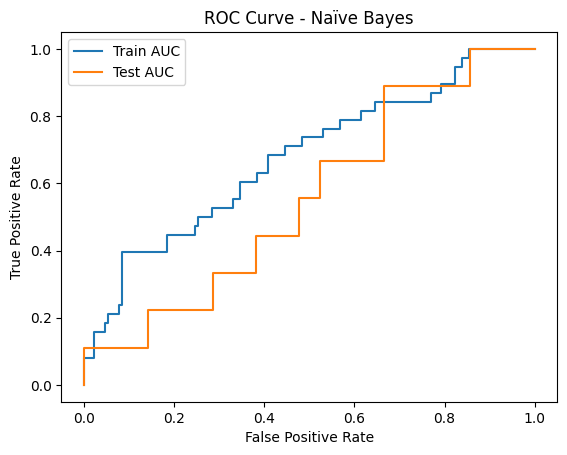

In [93]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
# print(y_train_pred)

print("Train:\n", classification_report(y_train,y_train_pred))
print("Test:\n", classification_report(y_test,y_test_pred))

train_auc=roc_auc_score(y_train,gnb.predict_proba(X_train)[:,1])
test_auc=roc_auc_score(y_test,gnb.predict_proba(X_test)[:,1])
print(f"Train AUC: {train_auc:.3f}\nTest AUC: {test_auc:.3f}")

fpr_train,tpr_train,_=roc_curve(y_train, gnb.predict_proba(X_train)[:, 1])
fpr_test,tpr_test,_=roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])

plt.plot(fpr_train, tpr_train, label=f"Train AUC")
plt.plot(fpr_test, tpr_test, label=f"Test AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

### ii. This data set is rather imbalanced. Balance your data set using SMOTE, by downsampling the common class in the training set to 90 instances and upsampling the uncommon class to 90 instances. Use k = 5 nearest neighbors in SMOTE. Remember not to change the balance of the test set. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. Does SMOTE help? (10 pts)

In [94]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [95]:
print("Original class distribution:", Counter(y_train))

rus=RandomUnderSampler(sampling_strategy={0: 90}, random_state=42)
X_train_down,y_train_down=rus.fit_resample(X_train, y_train)
print("After Downsampling:", Counter(y_train_down))

smote=SMOTE(sampling_strategy={1: 90}, random_state=42)
X_train_balanced,y_train_balanced=smote.fit_resample(X_train_down, y_train_down)
print("After SMOTE:", Counter(y_train_balanced))

Original class distribution: Counter({np.int64(0): 130, np.int64(1): 38})
After Downsampling: Counter({np.int64(0): 90, np.int64(1): 38})
After SMOTE: Counter({np.int64(0): 90, np.int64(1): 90})


Train (after balance):
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        90
           1       0.69      0.66      0.67        90

    accuracy                           0.68       180
   macro avg       0.68      0.68      0.68       180
weighted avg       0.68      0.68      0.68       180

Test (after balance):
               precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.36      0.44      0.40         9

    accuracy                           0.60        30
   macro avg       0.55      0.56      0.55        30
weighted avg       0.62      0.60      0.61        30

Train AUC: 0.747
Test AUC: 0.693


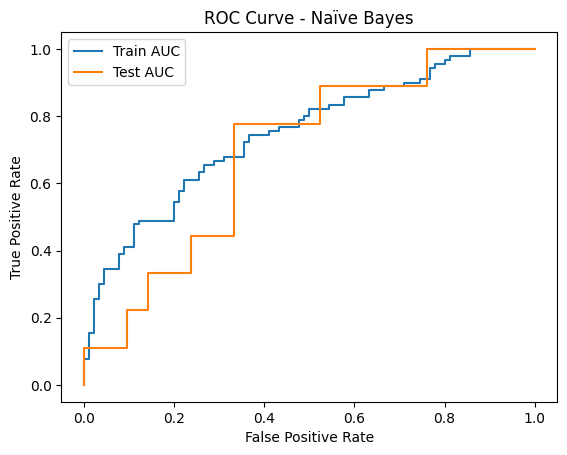

In [96]:
gnb_balanced=GaussianNB()
gnb_balanced.fit(X_train_balanced,y_train_balanced)

y_train_pred_balanced=gnb_balanced.predict(X_train_balanced)
y_test_pred_balanced=gnb_balanced.predict(X_test)

print("Train (after balance):\n", classification_report(y_train_balanced,y_train_pred_balanced))
print("Test (after balance):\n", classification_report(y_test,y_test_pred_balanced))

train_auc_balanced=roc_auc_score(y_train_balanced,gnb_balanced.predict_proba(X_train_balanced)[:,1])
test_auc_balanced=roc_auc_score(y_test,gnb_balanced.predict_proba(X_test)[:,1])
print(f"Train AUC: {train_auc_balanced:.3f}\nTest AUC: {test_auc_balanced:.3f}")

fpr_train_balanced,tpr_train_balanced,_=roc_curve(y_train_balanced, gnb_balanced.predict_proba(X_train_balanced)[:, 1])
fpr_test_balanced,tpr_test_balanced,_=roc_curve(y_test, gnb_balanced.predict_proba(X_test)[:, 1])

plt.plot(fpr_train_balanced, tpr_train_balanced, label=f"Train AUC")
plt.plot(fpr_test_balanced, tpr_test_balanced, label=f"Test AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

#### For training set:
* After SMOTE, the training AUC increased from 0.676 to 0.747, which means the model's ability to recognize minority class cases improved, achive better overall discrimination ability.
* But accuracy dropped slightly. It might because the original model was biased toward the majority class.


#### For test set:
* After SMOTE, the test AUC improved from 0.556 to 0.693, which also means a better overall discrimination ability.
* Recall for minority class 1 improved from 0.33 to 0.44, meaning better detection of recurrence cases.
* Overall accuracy slightly improved from 57% to 60%.

#### Conclusion:
SMOTE helps balance the dataset and improved model performance, particularly in detecting recurrence cases.

